## Assignment 1

1) Import các thư viện

In [ ]:
import numpy as np
import pandas as pd

2) Đọc dữ liệu

In [ ]:
dataframe = pd.read_csv('/content/forestfires.csv')
dataframe.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


3) Thực hiện các bước tiền xử lí dữ liệu

In [ ]:
dataframe.shape
#Show kích thước bộ dữ liệu

(517, 13)

In [ ]:
for column in dataframe.columns:
    print('Total NaN: ', dataframe[column].isna().sum())
    print('Total Null: ',dataframe[column].isnull().sum())
    print('Data Type: ', dataframe[column].dtype)
    print()
# Tính số cột Nan, Null và in ra kiểu dữ liệu cột đó

Total NaN:  0
Total Null:  0
Data Type:  int64

Total NaN:  0
Total Null:  0
Data Type:  int64

Total NaN:  0
Total Null:  0
Data Type:  object

Total NaN:  0
Total Null:  0
Data Type:  object

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  int64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64

Total NaN:  0
Total Null:  0
Data Type:  float64



In [ ]:
def convert_day(day):
    day_dict = {
        "sun" : 1,
        "mon" : 2,
        "tue" : 3,
        "wed" : 4,
        "thu" : 5,
        "fri" : 6,
        "sat" : 7
    }
    return day_dict[day]
#Chuyển cột thứ từ ký tự sang số

In [ ]:
def convert_month(month):
    month_dict = {
        'jan' : 1,
        'feb' : 2,
        'mar' : 3,
        'apr' : 4,
        'may' : 5,
        'jun' : 6,
        'jul' : 7,
        'aug' : 8,
        'sep' : 9,
        'oct' : 10,
        'nov' : 11,
        'dec' : 12
    }
    return month_dict[month]
#chuyển cột tháng từ ký tự sang số

In [ ]:
dataframe['day'] = dataframe['day'].apply(convert_day)
dataframe['month'] = dataframe['month'].apply(convert_month)

In [ ]:
dataframe.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
X = dataframe.drop(columns=['area']).values
X
#X được gán bằng dataframe loại bỏ cột "area"

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [ ]:
X = np.c_[np.ones((X.shape[0], 1)), X]
X
#Thêm một cột toàn số 1 vào X, ở đây để xử lý hệ số chặn trong Linear Regression

array([[ 1. ,  7. ,  5. , ..., 51. ,  6.7,  0. ],
       [ 1. ,  7. ,  4. , ..., 33. ,  0.9,  0. ],
       [ 1. ,  7. ,  4. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 1. ,  7. ,  4. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  1. ,  4. , ..., 42. ,  4. ,  0. ],
       [ 1. ,  6. ,  3. , ..., 31. ,  4.5,  0. ]])

In [ ]:
y = dataframe['area'].values
y
#Y được gán bằng cột "area" của dataframe( mô hình linear regression sẽ tính toán với input là x, output là y)

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [ ]:
print(X.shape, y.shape)
# in ra kích thước x và y

(517, 13) (517,)


In [ ]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# chia tahnfh các tập train và test với tỉ lệ 8/2

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# in kích thước các tập train, test

(413, 13) (413,)
(104, 13) (104,)


4) Linear Regression


In [ ]:


class LinearRegression:
    def __init__(self):
        self.coefficients = None  # Lưu trữ vector hệ số (theta)

    def fit(self, X_train, y_train):

        #Huấn luyện mô hình hồi quy tuyến tính bằng phương pháp bình phương tối thiểu (OLS). Công thức: theta = (X^T * X)^(-1) * X^T * y

        self.coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    def predict(self, X_test):

        #Dự đoán đầu ra dựa trên dữ liệu đầu vào X_test.

        return X_test @ self.coefficients

    def rmse(self, y_true, y_pred):

       # Tính toán Root Mean Squared Error (RMSE), đo lường sai số của mô hình.

        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def r2_score(self, y_true, y_pred):

        #Tính toán hệ số xác định R² (coefficient of determination), cho biết mức độ mô hình giải thích phương sai dữ liệu.

        total_variance = np.sum((y_true - np.mean(y_true)) ** 2)  # Phương sai tổng thể
        residual_variance = np.sum((y_true - y_pred) ** 2)  # Phương sai phần dư
        return 1 - (residual_variance / total_variance)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
#Thực hiện train model

In [ ]:
y_pred = model.predict(X_test)
y_pred
#y_pred đước gán bằng các kết quả dự đoán của mô hình

array([ 35.86336264,  18.86011859,  29.13040382,  20.49719535,
         4.30802124,  17.82243782,  17.79232917,  28.56508101,
        21.29951921,  30.0799854 ,  12.99213133,  37.05908323,
        24.76581421,  29.10475191,  22.29775976,  21.84349541,
        17.57920974,  34.60957851,  24.29797933,  25.72573151,
        11.94787392,  29.33446191,  19.34353907,  26.309323  ,
        23.87948049,  26.57212781,  10.89456439,  30.33641088,
        26.74744038,   1.89302383,  -1.10471642,  27.25512947,
         6.10752012,  13.48148612,  -2.15158518,  20.19967486,
        15.98414148,  14.36351233,   3.62577527,  19.4369615 ,
        26.0287659 ,  23.45553218,   2.76245464,  21.89518467,
        17.91398941,  27.81998056,  27.43440341,  22.56923031,
        27.81998056,  14.17378218,  -7.76888059,  -6.46267949,
        -0.4414507 ,  -2.09624903,  -0.05201683,   6.3649377 ,
        -0.79989943,   0.5203054 ,  15.204072  ,  11.41818341,
        21.10896399,  18.48769808,   8.49074487,  19.36

In [ ]:
rmse = model.rmse(y_test, y_pred)
# Tính số lỗi RMSE của mô hình.
r2 = model.r2_score(y_test, y_pred)
# Tính phương sai

In [ ]:
print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  79.4241834103971
R2:  0.009837702973422013


## Assignment 2

In [ ]:
X = dataframe.drop(columns=['area']).values
y = dataframe['area'].values
# Gán giá trị cho X và Y

In [ ]:
X_train, X_test = X[:split_index], X[split_index:] # 80% train, 20% test
y_train, y_test = y[:split_index], y[split_index:]
# Phân chia tập train, test.

In [ ]:
X_mean = X_train.mean()
X_std = X_train.std()
# TÍnh trung bình và độ lệch chuẩn của x
y_mean = y_train.mean()
y_std = y_train.std()
# Tính trung bình và độ lệch chuẩn của y

In [ ]:

# Chuẩn hóa dữ liệu bằng Z-score normalization
X_train_scaled = (X_train - X_mean) / X_std  # Chuẩn hóa tập huấn luyện
X_test_scaled = (X_test - X_mean) / X_std    # Chuẩn hóa tập kiểm tra dùng mean & std từ tập train

# Thêm cột bias (hệ số chặn) vào đầu ma trận đặc trưng
X_train_scaled = np.c_[np.ones((X_train.shape[0], 1)), X_train_scaled]  # Thêm cột 1 vào tập train
X_test_scaled = np.c_[np.ones((X_test.shape[0], 1)), X_test_scaled]    # Thêm cột 1 vào tập test

In [ ]:
# Chuẩn hóa dữ liệu bằng Z-score normalization
y_train_scaled = (y_train - y_mean) / y_std # Chuẩn hóa tập huấn luyện
y_test_scaled = (y_test - y_mean) / y_std # Chuẩn hóa tập kiểm tra dùng mean & std từ tập train

In [ ]:
model = LinearRegression()
# Thực hiện gán class Linear Regression đã định nghĩa ở trên cho biến model
model.fit(X_train_scaled, y_train_scaled)
# Thực hiện thuấn luyện mô hình

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)
# Gán giá trị dự đoán mô hình cho biến y_pred_scaled

In [ ]:
rmse_scaled = model.rmse(y_test_scaled, y_pred_scaled)
# Tính số lỗi RMSE của mô hình.
r2_scaled = model.r2_score(y_test_scaled, y_pred_scaled)
# Tính phương sai

In [ ]:
print('RMSE_scaled: ', rmse_scaled)
print('R2_scaled: ', r2_scaled)

RMSE_scaled:  1.3528567743564202
R2_scaled:  0.00983770295074371


### Nhận xét kết quả của mô hình trước và sau khi được huấn luyện trên dữ liệu đã được chuẩn hóa
-Sau khi chuẩn hóa dữ liệu về phân phối chuẩn, ta quan sát thấy RMSE giảm đáng kể từ 79.42 xuống còn 1.35. Tuy nhiên, giá trị \( R^2 \) hầu như không thay đổi, vẫn duy trì ở mức xấp xỉ 0.0098.  

-Việc chỉ dựa vào RMSE để đánh giá hiệu suất mô hình có thể dẫn đến kết luận sai lệch, do RMSE phụ thuộc vào đơn vị đo lường của dữ liệu, trong khi chuẩn hóa có thể làm thay đổi phạm vi giá trị của các biến. Ngược lại, giá trị \( R^2 \) phản ánh tỷ lệ phương sai của biến mục tiêu được giải thích bởi mô hình và không bị ảnh hưởng bởi đơn vị đo. Do đó, khi xem xét \( R^2 \), có thể kết luận rằng quá trình chuẩn hóa không cải thiện đáng kể chất lượng dự đoán của mô hình.  

-Nguyên nhân của hiện tượng này là do chuẩn hóa dữ liệu trong hồi quy tuyến tính giúp các đặc trưng có cùng quy mô, giảm thiểu ảnh hưởng của các biến có giá trị lớn, đồng thời cải thiện tốc độ hội tụ khi sử dụng thuật toán tối ưu như Gradient Descent. Ngoài ra, chuẩn hóa còn giúp tăng độ ổn định số học khi thực hiện các phép tính ma trận. Tuy nhiên, trong trường hợp sử dụng phương pháp Normal Equation để ước lượng tham số, mô hình không phụ thuộc vào tỷ lệ của các đặc trưng, do đó việc chuẩn hóa dữ liệu không mang lại sự cải thiện rõ rệt về độ chính xác dự đoán.

## Assignment 3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Import các thư viện

In [ ]:
X = dataframe.drop(columns=['area'])
y = dataframe['area'].values
# Thực hiện gán giá trị cho x và y từ dataframe

In [ ]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# Phân chia tập train, test.

In [ ]:
# Chuyển X_train thành DataFrame với tên cột từ tập dữ liệu gốc (loại bỏ cột 'area' vì đây là biến mục tiêu)
correlation_matrix = pd.DataFrame(
    X_train.values,  # Chuyển X_train từ mảng NumPy sang DataFrame
    columns=dataframe.drop(columns=['area']).columns  # Giữ lại tên các cột đặc trưng
).corr()  # Tính ma trận tương quan giữa các đặc trưng


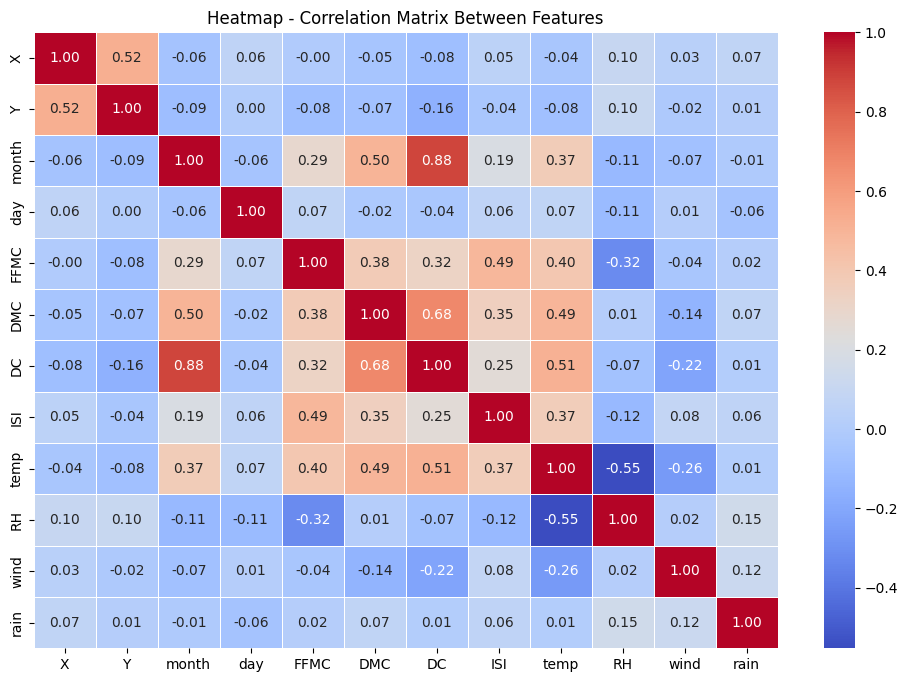

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap - Correlation Matrix Between Features')
plt.show()

In [ ]:
threshold = 0.85 # nguong loai bo
high_corr_features = set()

In [ ]:
# Duyệt qua từng cặp cột trong ma trận tương quan để tìm các đặc trưng có tương quan cao
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Chỉ xét một nửa ma trận (tránh lặp lại)
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Nếu giá trị tương quan lớn hơn ngưỡng đã chọn
            high_corr_features.add(correlation_matrix.columns[i])  # Thêm đặc trưng có tương quan cao vào tập hợp


In [ ]:
# Loại bỏ các đặc trưng có tương quan cao khỏi tập huấn luyện và tập kiểm tra
X_train_filtered = X_train.drop(columns=list(high_corr_features)).values  # Xóa các cột có tương quan cao khỏi tập huấn luyện
X_test_filtered = X_test.drop(columns=list(high_corr_features)).values  # Xóa các cột có tương quan cao khỏi tập kiểm tra


In [ ]:
print(X_train_filtered.shape, X_test_filtered.shape)

(413, 11) (104, 11)


In [ ]:
# Thêm cột hệ số chặn (bias term) vào tập huấn luyện và tập kiểm tra
X_train_filtered = np.c_[np.ones((X_train.shape[0], 1)), X_train_filtered]  # Thêm cột 1 vào đầu ma trận X_train_filtered
X_test_filtered = np.c_[np.ones((X_test.shape[0], 1)), X_test_filtered]  # Thêm cột 1 vào đầu ma trận X_test_filtered


In [ ]:
model = LinearRegression()
# Thực hiện gán class Linear Regression đã định nghĩa ở trên cho biến model
model.fit(X_train_filtered, y_train)
# Thực hiện huấn luyện mô hình

In [ ]:
y_pred_filtered = model.predict(X_test_filtered)

# Gán giá trị dự đoán mô hình cho biến y_pred_filtered

In [ ]:
rmse_filtered = model.rmse(y_test, y_pred_filtered)
r2_filtered = model.r2_score(y_test, y_pred_filtered)

In [ ]:
print('RMSE_filtered: ', rmse_filtered)
print('R2_filtered: ', r2_filtered)

RMSE_filtered:  79.52416249250541
R2_filtered:  0.007343303382001287


### Nhận xét về kết quả của mô hình trước và sau khi thực hiện loại bỏ các thuộc tính có tính chất colinearity bằng ma trận tương quan
-Sau khi áp dụng kỹ thuật Feature Engineering, kết quả cho thấy RMSE có sự gia tăng nhẹ (từ 79.42 lên 79.52), trong khi giá trị R² giảm từ 0.0098 xuống 0.0073. Điều này cho thấy phương pháp xử lý đặc trưng được áp dụng không có tác động đáng kể đến hiệu suất dự đoán của mô hình.

-Mặc dù đã loại bỏ một trong hai biến có mối tương quan cao, khả năng cao biến bị loại bỏ vẫn chứa thông tin quan trọng đối với đầu ra. Việc loại bỏ này có thể dẫn đến suy giảm hiệu suất dự đoán của mô hình. Ngoài ra, một nguyên nhân khác có thể đến từ quy mô dữ liệu tương đối nhỏ (chỉ 517 mẫu), khiến cho thông tin trong các đặc trưng còn lại không đủ mạnh để bù đắp sự thiếu hụt khi loại bỏ biến.

## Assignment 4

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
# Import thư viện

In [ ]:
X = dataframe.drop(columns=['area']).values
X = np.c_[np.ones((X.shape[0], 1)), X]
y = dataframe['area'].values
# Gán giá trị cho x và y , thêm một cột toàn số 1 cho x làm hệ số chặn Linear regression

In [ ]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# Phân chia tập train và tập test

In [ ]:
sklearn_model = LinearRegression()
# Thực hiện gán class Linear Regression đã định nghĩa ở trên cho biến sklearn_model
sklearn_model.fit(X_train, y_train)
# Thực hiện huấn luyện mô hình

LinearRegression()

In [ ]:
y_pred_sklearn = sklearn_model.predict(X_test)
# Gán giá trị dự đoán mô hình cho biến y_pred_sklearn

In [ ]:
rmse_sklearn = root_mean_squared_error(y_test, y_pred_sklearn)
#Tính toán lỗi RMSE
r2_sklearn = r2_score(y_test, y_pred_sklearn)
#Tính toán phương sai

In [ ]:
print('RMSE sklearn: ', rmse_sklearn)
print('R2 sklearn: ', r2_sklearn)

RMSE sklearn:  79.42418341039725
R2 sklearn:  0.00983770297341835


### Nhận xét về kết quả của mô hình khi sử dụng thư viện và khi dùng normal equation
- Sau khi sử dụng thư viện sklearn, ta quan sát thấy kết quả đánh giá RMSE và R2 so với sử dụng normal equation là giống hệt nhau. Lý cho cho điều này là vì căn bản, mô hình hồi quy tuyến tính của thư viện sklearn cũng được tạo nên từ phương trình normal equation, nên việc có kết quả như này là hoàn toàn hợp lý.